## Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


We're going to take the following approach
1.Problem definition
2.Data
3.Evaluation
4.Features
5.Modelling
6.Experimentation

### Problem Definition

Given clinical parameters about a patient we can predict whether he has heart disease or not

### Data

We have downloaded the heartdisease data set from the UCI machine learning repository website

### Evaluation

If we can reach 95% accuracy at predicting whether or not a  patient has heart disease during the proof of concept , we'll pursue the project.

### Features

* ageage in years
* sex(1 male;0= female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 =true;0= false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1=yes;0= no) 
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy 
* thal3 =normal; 
* 6=fixed defect; 
* 7=reversable defect
* target l or 0

## Preparing the tools
We're going to use pandas , Matplotlib and NumPy for data analysis and manipulation

In [208]:
#Import all the tools we need
# we want our plots to appear inside the notebook,so we use matplotlib inline
%matplotlib inline
#Regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 

#Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import RocCurveDisplay



## Load data

In [162]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rowsXcolumns)

(303, 14)

## Data Exploration(exploratory data analysis)
The goal here is to find out more about data and become a subject matter expert on the data
* What questions are you trying to solve?
* What kind of data do we have and how do we treat different types?
* Whats missing from the data and how do you deal with it?
* Wheres the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [164]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [165]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

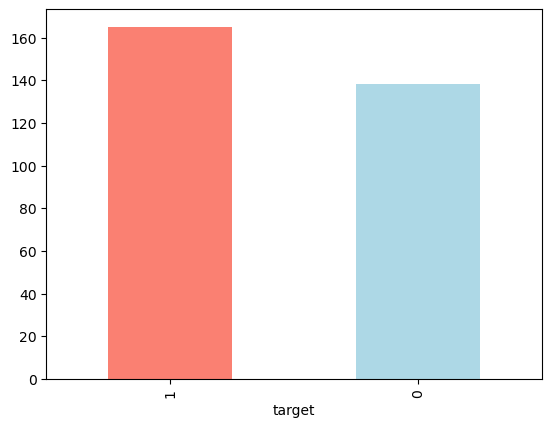

In [166]:
#We can see that this is a relatively balanced classification problem
#lets visualise the data
#always explain the data, so that others can understand more about it
df["target"].value_counts().plot(kind="bar",color =["salmon", "lightblue"]);

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [168]:
#to check if theres any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [169]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [170]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [171]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)
#Here 1 is male and 0 is female

sex,0,1
target,,
0,24,114
1,72,93


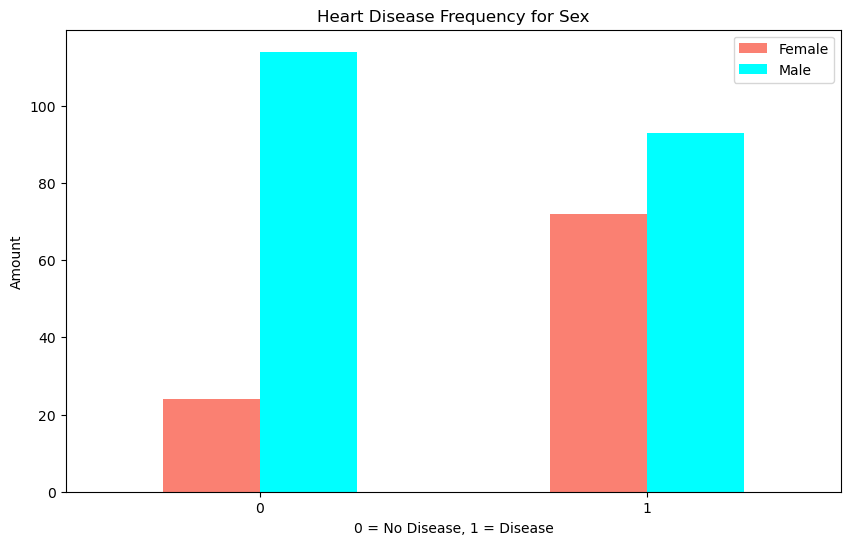

In [172]:
#Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind= "bar",figsize=(10,6), color=["salmon","cyan"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);
#All the extra steps after first line are to make the data visualisation more informative

* From the plot we can easily visualise that almost men are divided more equally in terms of having 
or not having heart disease, as we can see the ratio is almost 40:50
* But in case of women the data is more unbalanced in terms of having and not having heart disease as the ratio of people not having heart disease to having it is almost 1:3
* Also we can see that there are lesser number of women instances in data than men

## Finding Patterns 2

In [173]:
df["thalach"].value_counts()
#Thalach is maximum heart rate achieved
#we can see that thalach has a lot of different values

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

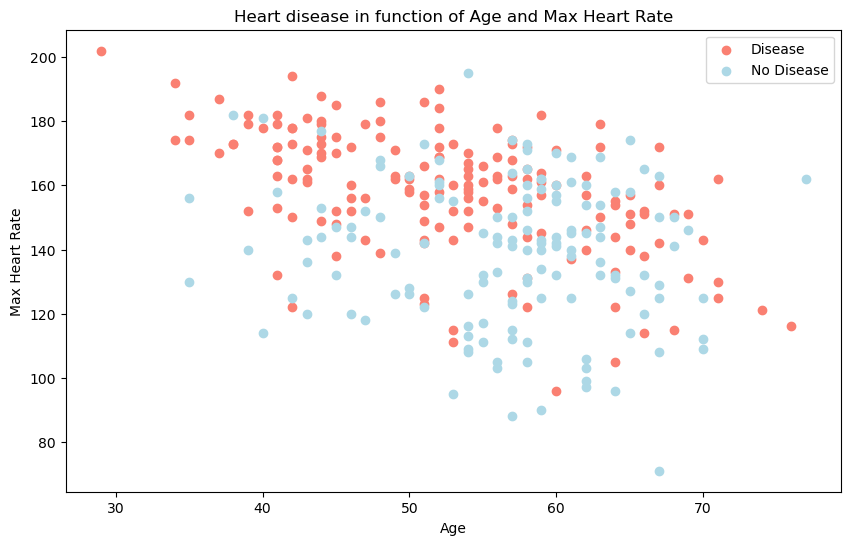

In [174]:
#create another figure
plt.figure(figsize =(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
#plot age and thalach where target =1 (heart disease)
#Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
#plot age and thalach where target=0 (without heart disease)
#Add some helpful info just to make this complex plot a little more understandable
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);


<Axes: ylabel='Frequency'>

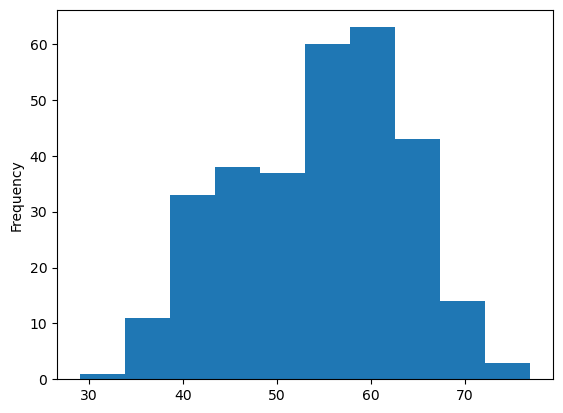

In [175]:
#Check the distribution of the age column with a histogram
df.age.plot.hist()

In [176]:
#We can see that the majority our dataset is in the 50-60 age range

## Chest pain(CP) vs Heart Disease(target)

cp -chest pain
* Typical angina
* 1-Atypical angina 
* 2-Non angina
* 3-Asymptomatic

In [177]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


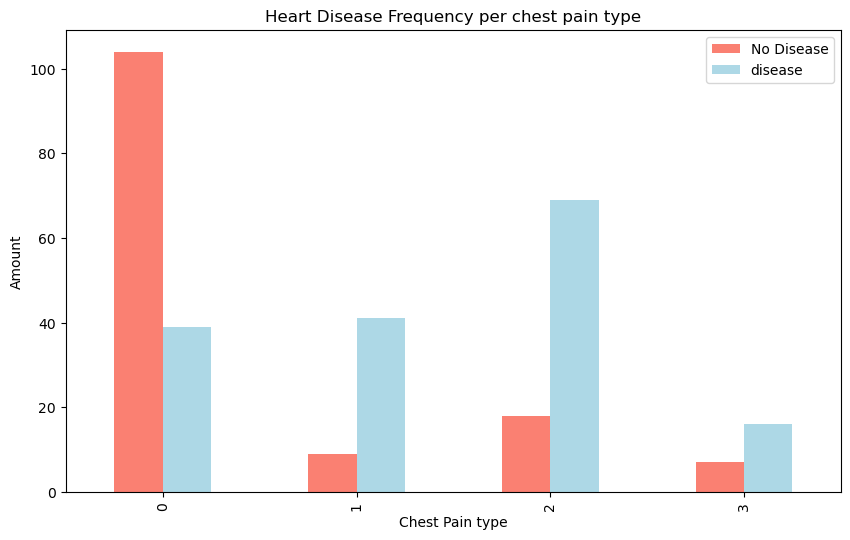

In [178]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize=(10,6),
                                   color=["salmon","lightblue"])
#Add some communication
plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "disease"])
           

## Finding patterns 3

#### Make a correlation matrix

In [179]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [180]:
#positive correlation coefficient suggests that the values are growing in the same direction
#and negative correlation coefficient tells us that the values are growing opposite to each other

(14.5, 0.5)

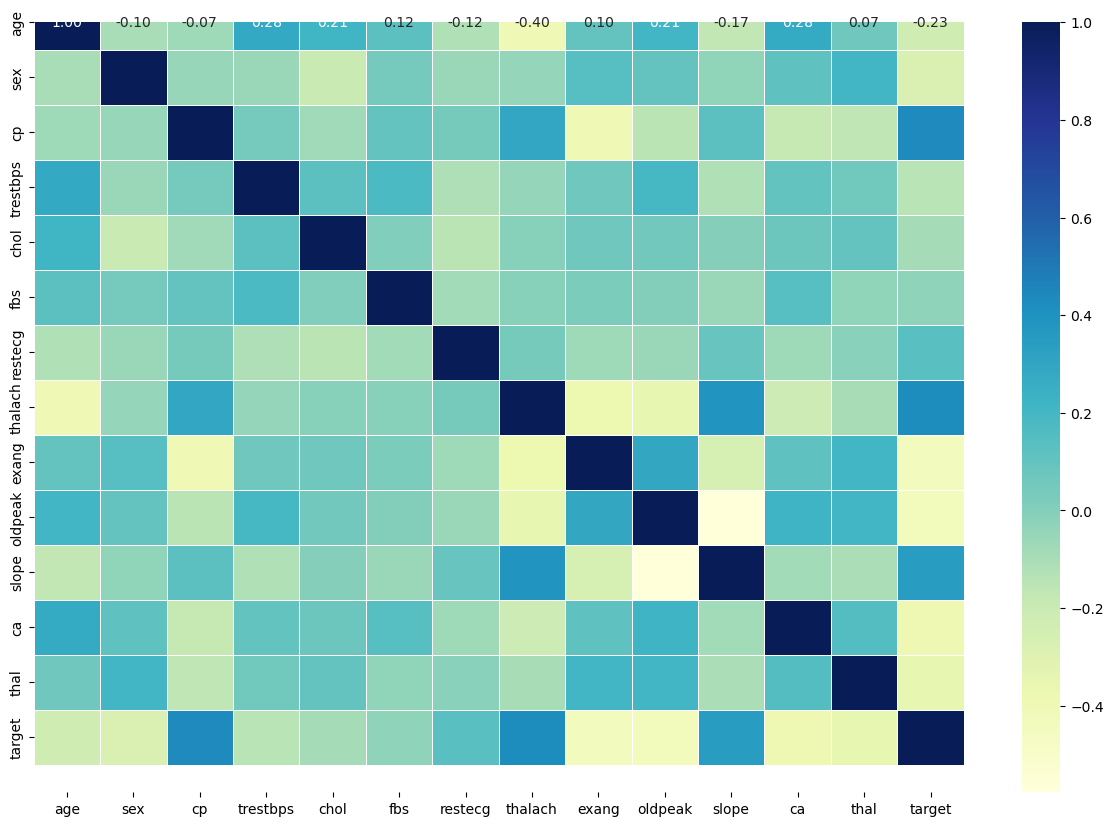

In [181]:
#lets make our correlation matrix a  little prettier
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize= (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top= ax.get_ylim()
ax.set_ylim(bottom +0.5,top=0.5)


In [182]:
#obviously every column gives a correlation value 1 with itself as they grow together in the same 
#direction exactly the same

## Preparing Our Data for Machine Learning (Modelling)

In [183]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [184]:
#Split data into x and y
#X will be equal to all the independent variables that is all the columns except target
#Y will be target
x = df.drop("target", axis=1) # all columns except the target
y = df["target"]

In [185]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [186]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [187]:
# Now we split our data into train and test split
#Our model should never learn from test set ,it should only be evaluated on test set
np.random.seed(42)

#split into train and test
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [188]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [189]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [190]:
#Now weve got our data split into training and test sets, its time to build a machine learning model.
#WE'll train it on the training set
#and we'll test it ont the test set

In [191]:
#Using the model tree we find the suitable model
#HOw to choose the correct model
#On the scikit learn website itslef you can find the flowchart for selecting the right model
#and the documentation ,syntax and properties of each model separately such as random forest classifier

#### At this stage we use machine learning 

In [192]:
We're going to try 3 different machine learning models:
* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

SyntaxError: unterminated string literal (detected at line 1) (1452686574.py, line 1)

In [ ]:
#Put models in a dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "RandomForest":RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """Fits and evaluates given machine learning models
    models : a dict of different Scikit-learn machine learning models"""
    #Set random seed
    np.random.seed(42)
    #Make a dictionary to keep model scores
    model_scores={}
    #loop through models
    for name,model in models.items():
        model.fit(x_train,y_train)#Fit the model to the data
        model_scores[name] = model.score(x_test,y_test)#Evaluate the model and append its score to model_scores
    return model_scores#this will return a dictionary    

In [ ]:
model_scores= fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

In [ ]:
#Logistic Regression has the highest score

## Model Comaprison

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now weve got a baseline model and we know a model's first prediction aren't always what we should 
base our next steps off. What should we do?

Lets look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

In [ ]:
#Hyperparameter tuning can be done by searching up HOw to tune Kneighbours classifier

### Hyperparameter tuning

In [ ]:
#Lets tune KNN
train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,21)

#Setup KNN instance
knn= KNeighborsClassifier()

#Loop through  different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #Fit the algorithm
    knn.fit(x_train,y_train)

    #Update the training scores list
    train_scores.append(knn.score(x_train,y_train))

    #Update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [ ]:
train_scores

In [ ]:
test_scores

In [ ]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data {max(test_scores)*100:.2f}%")


In [ ]:
#HOW did we do hyperparameter tuning here?
#Going through the documentation we come to know that the default value of n = 5 for KNN Classifier
#But by tuning the parameter we took it as n=20 we succeeded in improving the test score to 75% from
#the initial 68 something , this is called hyperparameter tuning

In [ ]:
#Since still it has a lower score than Logistic Regression model,we'll discard it for now

In [ ]:
#Remember that n neighbors is just one parameter of knn classifier , it has many other parameters which 
# are set to default ,we could also tune them and check the results under the hyperparameter tuning
#process,but it would be a lot tedious

## Hyperparameter tuning with RandomisedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()
... using RandomisedSearchCV

In [ ]:
#Search how to lune randomforestclassifier() ,go to the hyperparameter tuning article and learn what
#all parameters are there and what they and how can they be tuned(you will automatically understand this)
#param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
model_grid = RandomForestClassifier(max_depth=9, 
                                    max_features="log2", 
                                    max_leaf_nodes=9, 
                                    n_estimators=25) 
model_grid.fit(X_train, y_train) 
y_pred_grid = model.predict(X_test) 
print(classification_report(y_pred_grid, y_test)) 
like this also you can find

In [ ]:
#CV stands for cross validation  
#Create a hyperparameter grid for LogisticRegression 

In [ ]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

In [ ]:
#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_lead":np.arange(1,20,2)}

#The parameters that weve taken here for each classifier is after some research and web browsing 

Now we've got hyperparameter grids setup for each of our models, lets tune them using RandomisedSearchCV

In [194]:
#Tune LogisticRegression
np.random.seed(42)
#Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [195]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [196]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), lets do the same for RandomForestClassifier()`

In [197]:
#Setup random seed
np.random.seed(42)

#Setup random hyperparameter grid for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions= rf_grid,
                                cv=5,
                                n_iter=20,
                           verbose=True)
#Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


ValueError: Invalid parameter 'min_samples_lead' for estimator RandomForestClassifier(min_samples_split=16, n_estimators=10). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [198]:
# Find the best hyperparameters
rs_rf.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
#Evaluate the randomised search RandomForestClassifier model
rs_rf.score(x_test,y_test)

In [ ]:
model_scores

1. by hand
2. RandomisedSearchCv
3. GridSearchCV

#Hyperparameter tuning with Grid Search CV
Since our Logistic Regression model provides the best scores so far, we'll try and improve and improve them again using gridsearchcvm

In [200]:
#Different hyperparameters for our Logistic Regression Model
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver":["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid = log_reg_grid,
                                cv=5,
                          verbose=True
                           )
#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [201]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [202]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* classification report
* Precision
* Recall
* f1 score 

and it would be great if cross validation was used wherever possible

To make comparisons and evaluate our trained model, first we need to make predictions

In [203]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [204]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### What is a roc curve?

It is a way of understanding how our model is performing by comparing true positive to the false positivem

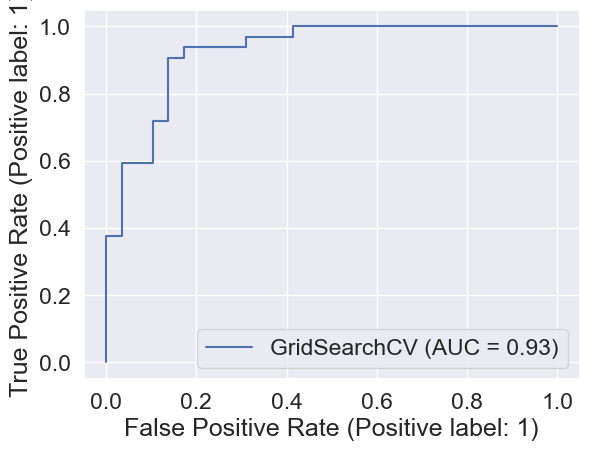

In [223]:
#Import roc curve function from sklearn. (already done in intro part)
#Plot the ROC Curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [213]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


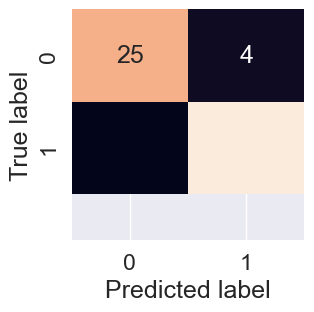

In [220]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 

    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom +0.5,top )
    
plot_conf_mat(y_test, y_preds)


- True negative-25
- False negative-4
- True positive-

In [224]:
#Now we've got a ROC  curve an AUC metric and a confusion matrix, lets get a classification report
#as well as cross validated precision ,recall and F1 score

In [225]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [226]:
# A model which produces no  false negatives  has a recall of 1
#a model which predicts 
#weighted means each metric is calculate with respect to number of samples in that class

### Calculate evaluation metrics using cross-validation
We're going to calculate precision, recall and f1-score of our model using cross-validation and to do
so we'll be using 'cross_val_score()

In [227]:
#Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [228]:
#Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [232]:
#Cross - validated accuracy 
cv_acc = cross_val_score(clf, x,y,cv=5,scoring ="accuracy")
cv_acc =np.mean(cv_acc)
cv_acc

0.8446994535519124

In [235]:
#Cross validated precision
cv_pre = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pre =np.mean(cv_pre)
cv_pre

0.8207936507936507

In [236]:
#Cross validated recall
cv_rec = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_rec  = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [238]:
#Cross validated precision
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 =np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

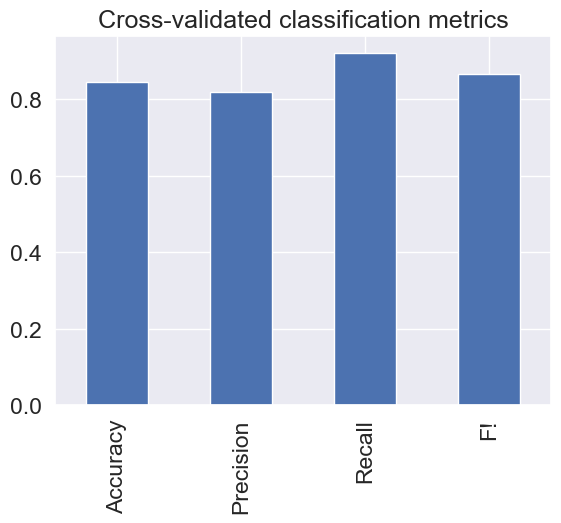

In [240]:
#Visulise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_pre,"Recall":cv_rec,"F!":cv_f1},index=[0])
cv_metrics.T.plot.bar(title = "Cross-validated classification metrics",legend=False)

### Feature Importance
Its another way of asking which features contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each learning model,so search up how to find feature importance for so and  so

In [241]:
#### Lets find feature importance for logistic regression

In [242]:
gs_log_reg.best_params_
clf = LogisticRegression(C =  0.20433597178569418,
                         solver = "liblinear")
clf.fit(x_train,y_train);

In [243]:
#Check coef
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

The coefficient array basically tells us how each independent value(or column ) affects the target(dependent variable)
But lets make into a more understandable form

In [246]:
#Match coefs of features of columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict
#So basically we have matched each value in the df to a value in the coeff array using a dictionary

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

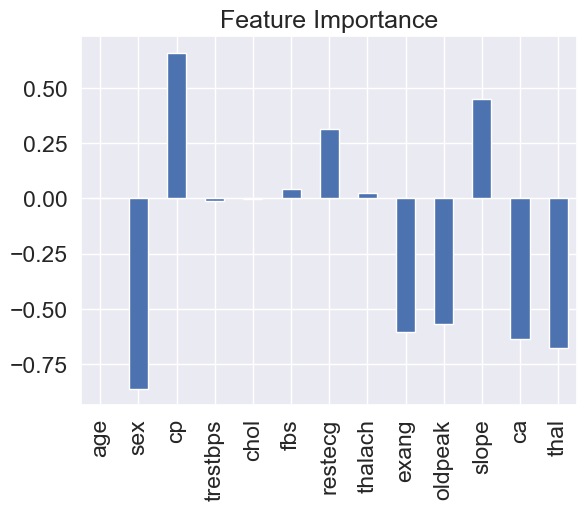

In [247]:
#Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance",legend = False);

This is basically like correlation coefficients ,take sex for example the more it increases the less the target value becomes ,lets check this out

In [248]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


We can see thamt as the sex value becomes 1, the target value goes down to 1:2 ratio from 1:3 ratio

In [250]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

if you havent hit your evaluation metric yet ... ask yourself...
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good (you have hit your evaluation metric ) how would you export it and share it with others?